In [47]:
import pandas as pd
import alpha_beta as ab
import matplotlib.pyplot as plt
import seaborn as sns

#df1_name =  "df1_20000_50.csv" #"df1.csv"
#df2_name = "df2_20000_50.csv" # "df2.csv" #



store = False
store_plot = True

df1_name =  "data_abalon/abalon1_1500_10.csv" #"income_df1_1000_10.csv" #"df1.csv"
df2_name =  "data_abalon/abalon2_1500_10.csv" #"income_df2_1000_10.csv" # "df2.csv" 

#load dfs
df1 = pd.read_csv(df1_name)
df2 = pd.read_csv(df2_name)
#original to store it as reference
original_df1 = pd.read_csv(df1_name)
original_df2 = pd.read_csv(df2_name)
#intialize clusters
df1["cluster"] = 0
df2["cluster"] = 0 
original_df1["cluster"] = 0
original_df2["cluster"] = 0 
 
#------------------------------------PARAMETERS------------------------
MinClusterSize=3# MAX 7

counts1 = df1["Class"].value_counts().to_list()
print(ab.check_eligibility(counts1,MinClusterSize))
counts2 = df2["Class"].value_counts().to_list()
print(ab.check_eligibility(counts2,MinClusterSize))

method = "ord_sample" #"choice"->at least 1/"sample"-> exactly 1; ord_sample -> sample preserving order
#If the clusters must be generalized
generalize = True

sensitive_column = "Class"
quasiidentifiers = ["Length",'Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight'] 
attributes =["Length",'Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight',"Class"] 
#-----------------------------------------------------------------------
#Add risk columns as default is less than 1/Minclustersize
df1["risk"] = 1/MinClusterSize
df2["risk"] = 1/MinClusterSize
original_df1["risk"] = 1/MinClusterSize
original_df2["risk"] = 1/MinClusterSize

#ab.check_eligibility(df1["occupation"].value_counts().to_list(),5)
#df2


True
True


In [48]:
df2.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Class               int64
identifier          int64
cluster             int64
risk              float64
dtype: object

In [49]:

#Create cluster for each publication
ab.compute_clusters(df=df1,sensitive_column=sensitive_column,MinClusterSize=MinClusterSize)
ab.compute_clusters(df=df2,sensitive_column=sensitive_column,MinClusterSize=MinClusterSize)

#Optimize clusters
ab.optimize_clusters(df1,sensitive_column,quasiidentifiers,generalize=generalize)
###df1.to_csv(df1_name[:-4]+"_"+str(MinClusterSize)+"_"+"cluster.csv",index=False)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class,identifier,cluster,risk
0,2,0.765766,0.775910,0.162242,0.507349,0.468281,0.393461,0.367049,4,1021,1,0.333333
1,1,0.292793,0.282913,0.061947,0.040257,0.028357,0.037525,0.036705,0,297,185,0.333333
2,2,0.761261,0.747899,0.148968,0.403046,0.326608,0.280667,0.350606,6,3698,325,0.333333
3,0,0.434685,0.422969,0.110619,0.107550,0.084510,0.078780,0.091513,7,590,411,0.333333
4,0,0.614865,0.602241,0.115044,0.272003,0.196032,0.224709,0.183690,6,3902,326,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0.533784,0.529412,0.101770,0.164158,0.119368,0.121791,0.159608,8,3833,344,0.333333
1496,2,0.632883,0.613445,0.134218,0.285166,0.238063,0.232170,0.234180,5,461,499,0.333333
1497,2,0.788288,0.784314,0.168142,0.515318,0.426138,0.423524,0.412556,5,2700,500,0.333333
1498,2,0.650901,0.644258,0.132743,0.360073,0.342412,0.299539,0.224215,2,1456,141,0.333333


In [50]:
df2.loc[df2["cluster"]==0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class,identifier,cluster,risk


In [51]:
#copy clusters generated prior to casino privacy
cluster_df1 = df1.copy()
cluster_df2 = df2.copy()


#compute shared tuples
merged_df = pd.merge(df1, df2, on='identifier', how='inner')
merged_df = merged_df[["identifier","cluster_x","cluster_y"]]
shared_identifiers = merged_df["identifier"].to_list()

#Make permutation version
generalized_df1 = df1.copy()
generalized_df2 = df2.copy()


# and store
if store:
    generalized_df1.to_csv("/workspaces/python-2/cache_operations/abalon1_"+str(MinClusterSize)+"_"+"generalized_"+str(generalize)+".csv",index=False)
    generalized_df2.to_csv("/workspaces/python-2/cache_operations/abalon2_"+str(MinClusterSize)+"_"+"generalized_"+str(generalize)+".csv",index=False)
    all_generalized = pd.concat([generalized_df1,generalized_df2])
    all_generalized.to_csv("/workspaces/python-2/cache_operations/abalon_all_"+str(MinClusterSize)+"_"+"generalized_"+str(generalize)+".csv",index=False)

#Enforce casino-privacy
ab.randomize_clusters(df=df2,sensitive_column=sensitive_column,method =method)
ab.randomize_clusters(df=df1,sensitive_column=sensitive_column,method =method)

if store:
    df1.to_csv("/workspaces/python-2/cache_operations/abalon1_"+str(MinClusterSize)+"_"+method+"_"+"cp_"+"generalized_"+str(generalize)+".csv",index=False)
    df2.to_csv("/workspaces/python-2/cache_operations/abalon2_"+str(MinClusterSize)+"_"+method+"_"+"cp_"+"generalized_"+str(generalize)+".csv",index=False)
    all_generalized = pd.concat([df1,df2])
    all_generalized.to_csv("/workspaces/python-2/cache_operations/abalon_all_"+str(MinClusterSize)+"_"+method+"_"+"cp_"+"generalized_"+str(generalize)+".csv",index=False)




In [52]:
#Compute intersection attacks and check intersection is pairwise

#Check intersection is pairwise df1, df2
#Shared identifiers
merged_df = pd.merge(df1, df2, on='identifier', how='inner')

merged_df = merged_df[["identifier","cluster_x","cluster_y"]]
shared_identifiers = merged_df["identifier"].to_list()

tmpx= max(merged_df["cluster_x"].value_counts().to_list())

tmpy= max(merged_df["cluster_y"].value_counts().to_list())

if max(tmpx,tmpy)==1:
    print("All ok")
else:
    print("Warning:Risk of non-paiwise association")
    print(tmpx,tmpy)
all_ok = max(tmpx,tmpy)==1

#merged_df


All ok


In [53]:
#Compute risks of casino private clusters
for user in merged_df["identifier"].value_counts().index.to_list(): #for each pair of clusters with a shared user
    #user = 39652 #test
    #cluster of user
    #print(user)
    [cluster_1] = merged_df.loc[merged_df["identifier"]==user,"cluster_x"].to_list()
    [cluster_2] = merged_df.loc[merged_df["identifier"]==user,"cluster_y"].to_list()
    #compute signature of those clusters
    signature_1 = df1.loc[df1["cluster"]==cluster_1,sensitive_column].to_list()
    signature_2 = df2.loc[df2["cluster"]==cluster_2,sensitive_column].to_list()
    #compute v1,k1,v2,k2,delta,(j=1)
    delta = len(set(signature_1) & set(signature_2) )  # shared values
    v1 = len(signature_1)-len(set(signature_1))        # repeated values of cluster_1
    k1 = len(signature_1)-delta-v1                     # unique values of cluster_1
    v2 = len(signature_2)-len(set(signature_2))        # repeated values of cluster_1
    k2 = len(signature_2)-delta-v2                     # unique values of cluster_1
    U = delta+k1*v2+k2*v1+v1*v2
    #we compute the risk depending on the case for each tuple in cluster
    #users in cluster of df1
    cluster_1_identifier = df1.loc[(df1["cluster"]==cluster_1) & (df1["identifier"] != user),"identifier"].to_list()

    for identifier in cluster_1_identifier:
        #true sd of user with identifier
        
        [sd_user] = original_df1.loc[original_df1["identifier"]==identifier,sensitive_column].to_list()
        if sd_user in signature_1 and sd_user in signature_2: #shared between clusters 
            #only nontight cas
            df1.loc[df1["identifier"]==identifier,"risk"] =   (U-1+v1)/(U*(len(signature_1)-1))
            if MinClusterSize==2:
                df1.loc[df1["identifier"]==identifier,"risk"] =   1/2
        else:
            df1.loc[df1["identifier"]==identifier,"risk"] = (U-v2)/(U*(len(signature_1)-1))
    #compute the risk of the shared user
    [sd_user] = original_df1.loc[original_df1["identifier"]==user,sensitive_column].to_list()
    if sd_user in signature_1 and sd_user in signature_2:
        df1.loc[df1["identifier"]==user,"risk"] = 1/U
    elif sd_user in signature_1:
        df1.loc[df1["identifier"]==user,"risk"] = v2/U
    elif sd_user in signature_2:
        df1.loc[df1["identifier"]==user,"risk"] = v1/U
    else:
        df1.loc[df1["identifier"]==user,"risk"] = 0 #if info not in any of the clusters

#df1.loc[df1["cluster"]==cluster_1]
        
    


In [54]:
#Compute risks of NON casino private clusters
for user in merged_df["identifier"].value_counts().index.to_list(): #for each pair of clusters with a shared user
    #user = 39652 #test
    #cluster of user
    [cluster_1] = merged_df.loc[merged_df["identifier"]==user,"cluster_x"].to_list()
    [cluster_2] = merged_df.loc[merged_df["identifier"]==user,"cluster_y"].to_list()
    #compute signature of those clusters
    signature_1 = cluster_df1.loc[cluster_df1["cluster"]==cluster_1,sensitive_column].to_list()
    signature_2 = cluster_df2.loc[cluster_df2["cluster"]==cluster_2,sensitive_column].to_list()
    #compute v1,k1,v2,k2,delta,(j=1)
    delta = len(set(signature_1) & set(signature_2) )  # shared values
    #v1 = len(signature_1)-len(set(signature_1))        # repeated values of cluster_1
    k1 = len(signature_1)-delta                   # unique values of cluster_1
    #v2 = len(signature_2)-len(set(signature_2))        # repeated values of cluster_1
    k2 = len(signature_2)-delta                     # unique values of cluster_1
    
    #we compute the risk depending on the case for each tuple in cluster
    #users in cluster of df1 
    cluster_1_identifier = cluster_df1.loc[(cluster_df1["cluster"]==cluster_1) & (cluster_df1["identifier"] != user),"identifier"].to_list()
    
    #compute the risk of the NOT shared user
    for identifier in cluster_1_identifier:
        #true sd of user with identifier
        [sd_user] = original_df1.loc[original_df1["identifier"]==identifier,sensitive_column].to_list()
        if sd_user in signature_1 and sd_user in signature_2: #shared sd between clusters
            cluster_df1.loc[cluster_df1["identifier"]==identifier,"risk"] =   (delta-1)/(delta*(k1+delta-1))
        else:
            cluster_df1.loc[cluster_df1["identifier"]==identifier,"risk"] = (1)/(k1+delta-1)
    #compute the risk of the shared user
    [sd_user] = original_df1.loc[original_df1["identifier"]==user,sensitive_column].to_list()
    if sd_user in signature_1 and sd_user in signature_2:
        cluster_df1.loc[cluster_df1["identifier"]==user,"risk"] = 1/delta
    #elif sd_user in signature_1:
        #cluster_df1.loc[cluster_df1["identifier"]==user,"risk"] = v2/U
    #elif sd_user in signature_2:
        #cluster_df1.loc[cluster_df1["identifier"]==user,"risk"] = v1/U
    else:
        print("Error: no consistent sd")
        #cluster_df1.loc[cluster_df1["identifier"]==user,"risk"] = 0 #if info not in any of the clusters

#df1.loc[df1["cluster"]==cluster_1]
    


In [55]:
# #Plot the risk for each df only of tuples in interesting clusters

merged_risk = pd.merge(df1, df2, on='identifier', how='inner')

interesting_clusters_df1 = merged_risk["cluster_x"].to_list()
interesting_clusters_df1 = list(set(interesting_clusters_df1))

int_df1 = df1.loc[df1["cluster"].isin(interesting_clusters_df1)].reset_index(drop=True)
int_cl_df1 = cluster_df1.loc[cluster_df1["cluster"].isin(interesting_clusters_df1)].reset_index(drop=True)

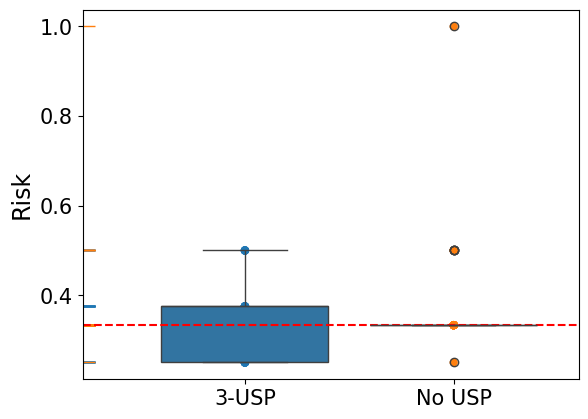

max risk cp:  0.5 , nº: 6
max risk cl:  1.0 , nº: 1
True


In [56]:
# Combine the two columns into a single DataFrame with a 'key' column
combined_df = pd.concat([int_df1.assign(key=str(MinClusterSize)+'-USP'), int_cl_df1.assign(key='No USP')])

custom_palette = ["black","black"]
ax= sns.boxplot(data=combined_df,x="key", y='risk',hue="key") #,flier_kws=dict(facecolor=".7", linewidth=.5,alpha=0))
#ax.set_xlim(0, 1.05)
sns.rugplot(data=combined_df, y='risk',hue="key",legend=False)
sns.scatterplot(data=combined_df, y='risk',x='key',hue="key",linewidth=0,legend=False,marker="o")
plt.axhline(y=1/MinClusterSize, color='red', linestyle='--', label='y=1/'+str(MinClusterSize))
#Font size
ax.tick_params(axis='both', labelsize=15)
ax.set_xlabel("", fontsize=17)  # X-axis label
ax.set_ylabel("", fontsize=17)  # Y-axis label
# Add labels and title
plt.ylabel('Risk')

# Display the plot
intersection_size = len(shared_identifiers)
if store_plot:
    plt.savefig('/workspaces/umea/USP/Abalon_'+str(intersection_size)+"_"+str(MinClusterSize)+'_'+str(all_ok)+'.pdf',bbox_inches='tight')
plt.show()
max_risk=(max(int_df1["risk"]))
max_risk_cl=(max(int_cl_df1["risk"]))
print("max risk cp: ",max_risk,", nº:",len(int_df1.loc[int_df1["risk"]>=max_risk]) )
print("max risk cl: ",max_risk_cl,", nº:",len(int_cl_df1.loc[int_cl_df1["risk"]==max_risk_cl]) )
print(all_ok)

In [57]:
cluster_df1.loc[cluster_df1["cluster"]==391]


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class,identifier,cluster,risk
561,0,0.718468,0.736695,0.122419,0.343781,0.246694,0.276278,0.315728,8,496,391,1.0
615,1,0.718468,0.736695,0.122419,0.343781,0.246694,0.276278,0.315728,6,599,391,0.5
620,2,0.718468,0.736695,0.122419,0.343781,0.246694,0.276278,0.315728,9,408,391,0.5


In [58]:

cluster_df2.loc[cluster_df2["cluster"]==496      ]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class,identifier,cluster,risk
1433,0,0.520270,0.504202,0.115044,0.161502,0.128447,0.138249,0.128052,7,532,496,0.333333
1443,0,0.743243,0.747899,0.132743,0.336816,0.231002,0.293614,0.302441,8,496,496,0.333333
1469,1,0.391892,0.361345,0.066372,0.077740,0.063215,0.057933,0.068261,0,1832,496,0.333333


In [59]:
df1.loc[df1["cluster"]==391]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class,identifier,cluster,risk
561,0,0.718468,0.736695,0.122419,0.343781,0.246694,0.276278,0.315728,8,496,391,0.250
615,1,0.718468,0.736695,0.122419,0.343781,0.246694,0.276278,0.315728,9,599,391,0.375
620,2,0.718468,0.736695,0.122419,0.343781,0.246694,0.276278,0.315728,9,408,391,0.375


In [60]:
#Make query precision comparison?
print(MinClusterSize,all_ok,method)
print(df1_name)

3 True ord_sample
data_abalon/abalon1_1500_10.csv
